<a href="https://colab.research.google.com/github/17092003vamsi/guner/blob/main/08/10/2024%20p2%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-84703bcb3b96>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Type'].fillna('', inplace=True)


Validation Accuracy: 90.08%
Test Accuracy: 90.00%

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.94      0.94      0.94        50
           2       0.84      0.94      0.89        50
           3       0.93      0.91      0.92        45
           4       0.89      0.80      0.84        40
           5       0.87      0.82      0.84        49

    accuracy                           0.90       280
   macro avg       0.90      0.90      0.90       280
weighted avg       0.90      0.90      0.90       280



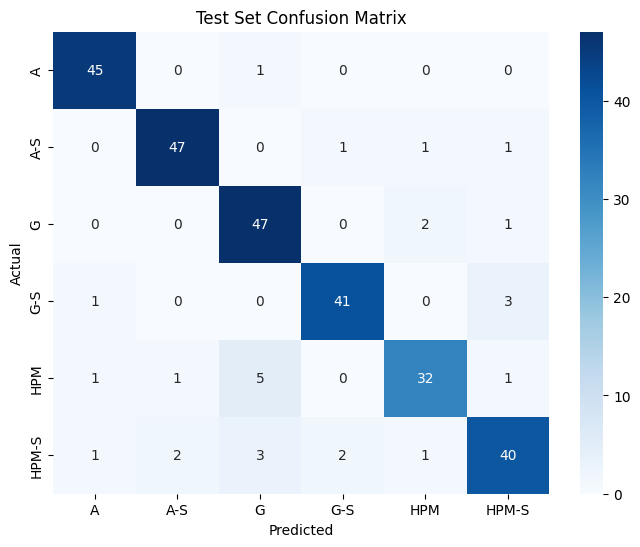

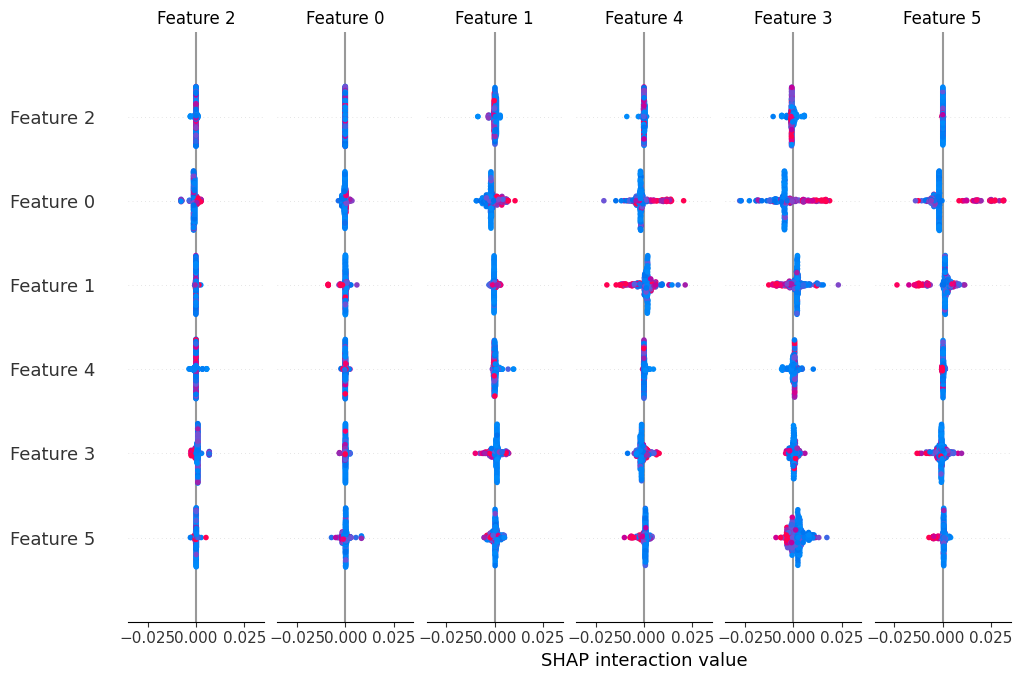

In [3]:


import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import shap

# Load the dataset
file_path = 'project 2 sap.csv'  # Path to your CSV file
data = pd.read_csv(file_path)

# Preprocessing: Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Lable'])  # Encode the categorical 'Lable' column

# Fill NaN values in the 'Type' column with an empty string
data['Type'].fillna('', inplace=True)

# NLP preprocessing for the 'Type' column using TF-IDF
tfidf = TfidfVectorizer(max_features=500)  # Set max_features to limit dimensionality
X_type = tfidf.fit_transform(data['Type']).toarray()  # Transform the 'Type' column

# Combine NLP features with existing numerical data
X_numeric = data.drop(columns=['Type', 'Lable']).values  # Drop 'Type' and 'Lable' columns for numerical data
X = np.hstack((X_numeric, X_type))  # Combine numerical and NLP features

# Now 'X' is defined, and we can proceed with splitting the data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a validation set from the training data
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_split, y_train_split)

# Predict on validation and test sets
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

# Accuracy on validation and test sets
val_accuracy = accuracy_score(y_val, y_pred_val)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Display validation and test accuracy
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Display the classification report
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test))

# Confusion matrix and classification report for the test set
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Test Set Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# SHAP explainability analysis
explainer = shap.TreeExplainer(model)
shap_values_test = explainer.shap_values(X_test)
shap.summary_plot(shap_values_test, X_test, plot_type="bar")


<ipython-input-4-ba2d5676bea6>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Type'].fillna('', inplace=True)


Validation Accuracy: 90.08%
Test Accuracy: 90.00%

Classification Report (Test Set):
              precision    recall  f1-score   support

           A       0.94      0.98      0.96        46
         A-S       0.94      0.94      0.94        50
           G       0.84      0.94      0.89        50
         G-S       0.93      0.91      0.92        45
         HPM       0.89      0.80      0.84        40
       HPM-S       0.87      0.82      0.84        49

    accuracy                           0.90       280
   macro avg       0.90      0.90      0.90       280
weighted avg       0.90      0.90      0.90       280



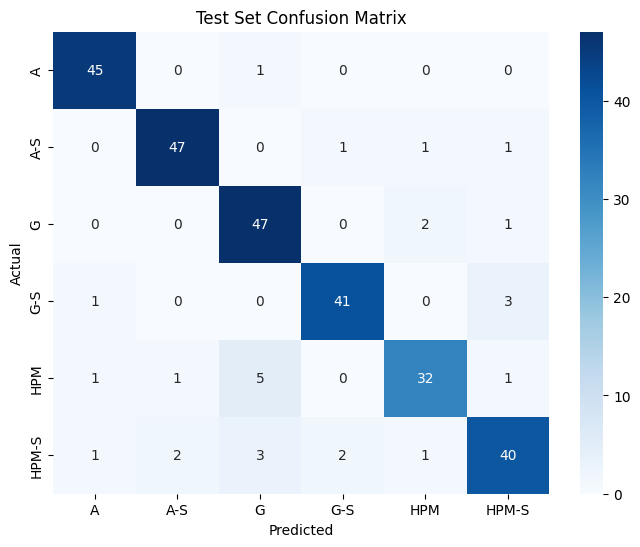

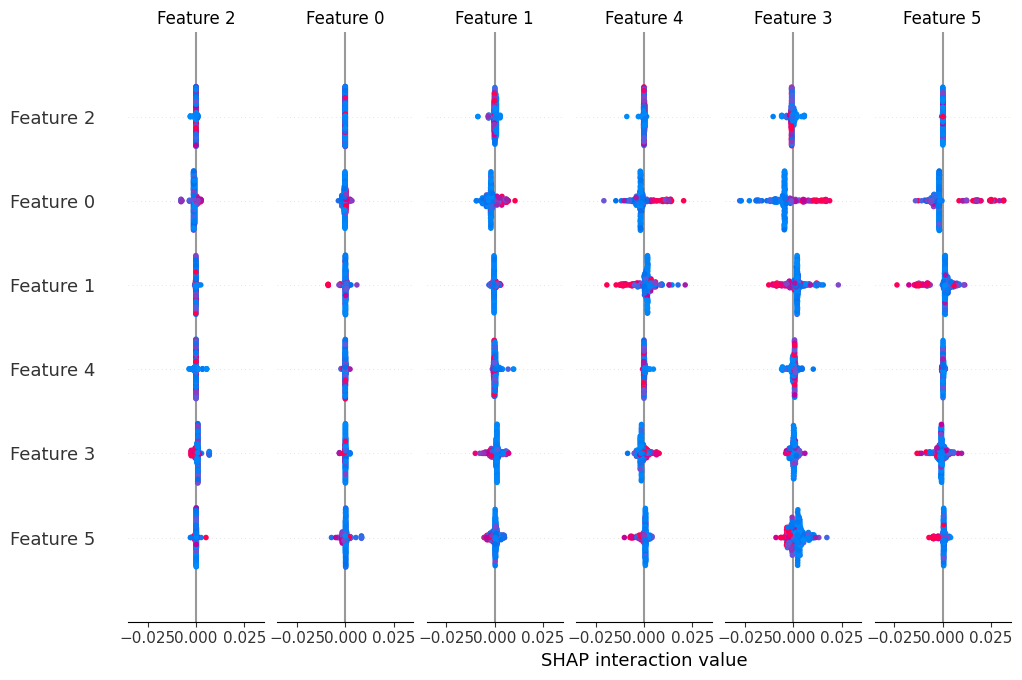

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import shap

# Load the dataset
file_path = 'project 2 sap.csv'  # Path to your CSV file
data = pd.read_csv(file_path)

# Preprocessing: Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Lable'])  # Encode the categorical 'Lable' column

# Fill NaN values in the 'Type' column with an empty string
data['Type'].fillna('', inplace=True)

# NLP preprocessing for the 'Type' column using TF-IDF
tfidf = TfidfVectorizer(max_features=500)  # Set max_features to limit dimensionality
X_type = tfidf.fit_transform(data['Type']).toarray()  # Transform the 'Type' column

# Combine NLP features with existing numerical data
X_numeric = data.drop(columns=['Type', 'Lable']).values  # Drop 'Type' and 'Lable' columns for numerical data
X = np.hstack((X_numeric, X_type))  # Combine numerical and NLP features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a validation set from the training data
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_split, y_train_split)

# Predict on validation and test sets
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

# Accuracy on validation and test sets
val_accuracy = accuracy_score(y_val, y_pred_val)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Display validation and test accuracy
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Display the classification report which includes support
print("\nClassification Report (Test Set):")
class_report = classification_report(y_test, y_pred_test, target_names=label_encoder.classes_)
print(class_report)

# Confusion matrix and classification report for the test set
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Test Set Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# SHAP explainability analysis
explainer = shap.TreeExplainer(model)
shap_values_test = explainer.shap_values(X_test)
shap.summary_plot(shap_values_test, X_test, plot_type="bar")


<ipython-input-5-af614dca6d0a>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Type'].fillna('', inplace=True)


Validation Accuracy: 90.08%
Test Accuracy: 90.00%


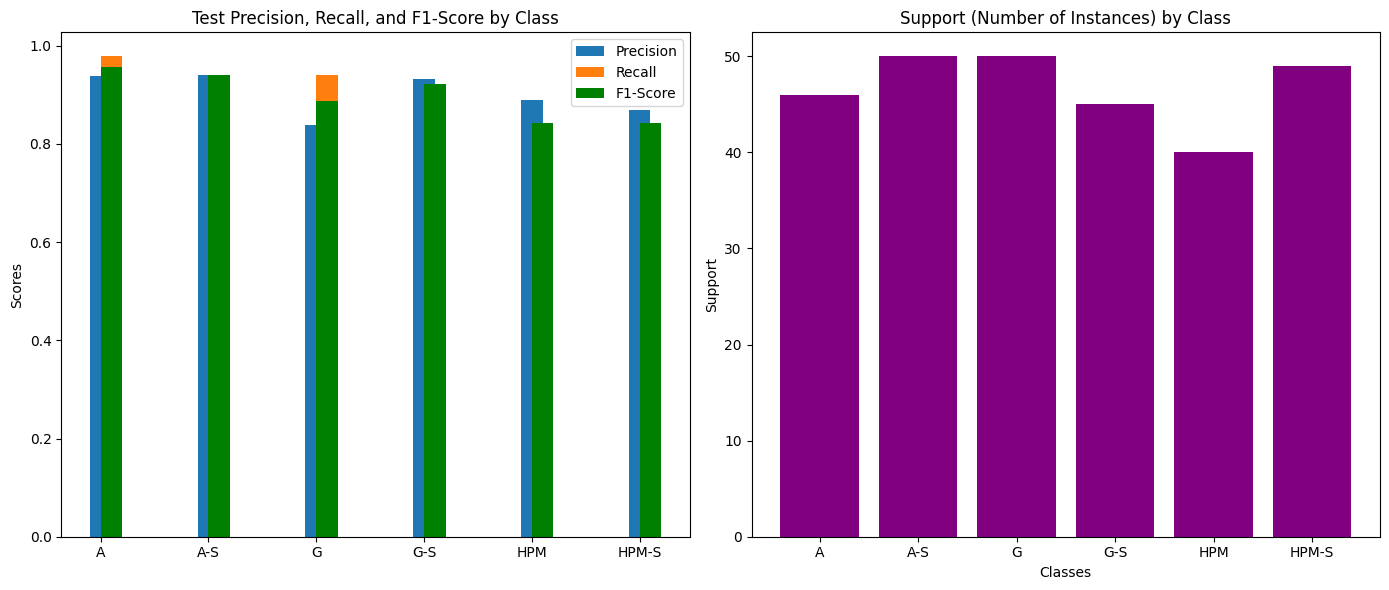

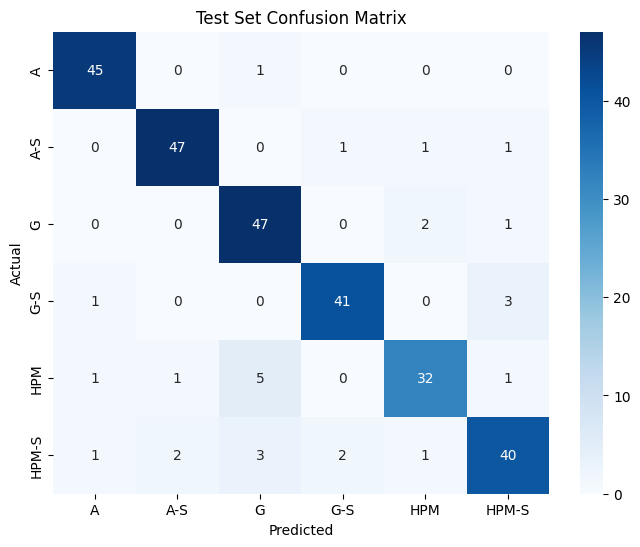

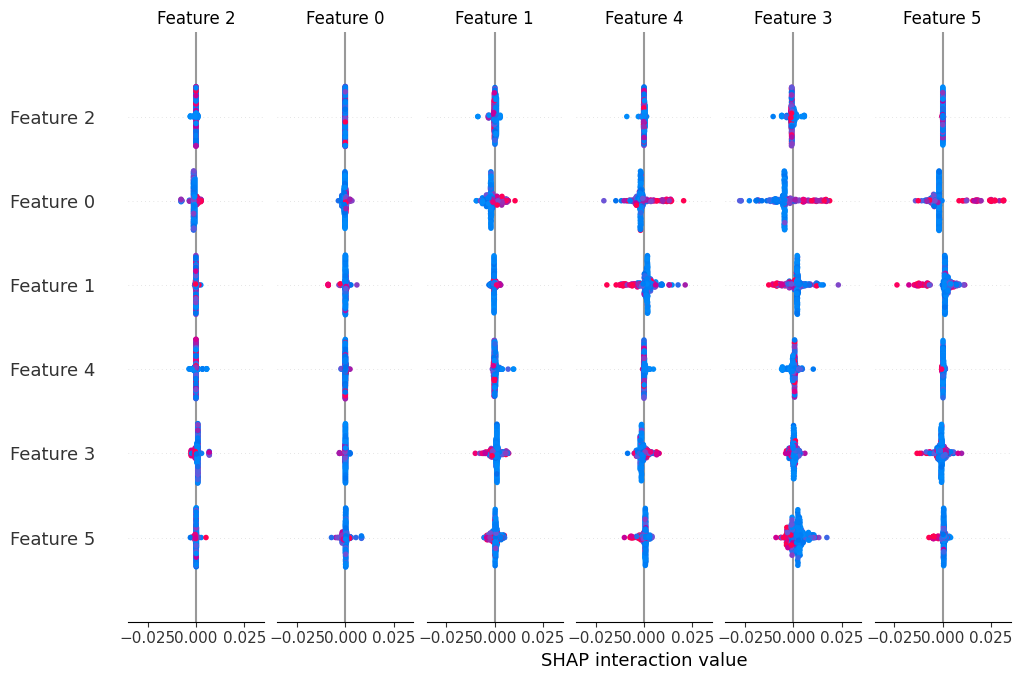

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import shap

# Load the dataset
file_path = 'project 2 sap.csv'  # Path to your CSV file
data = pd.read_csv(file_path)

# Preprocessing: Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Lable'])  # Encode the categorical 'Lable' column

# Fill NaN values in the 'Type' column with an empty string
data['Type'].fillna('', inplace=True)

# NLP preprocessing for the 'Type' column using TF-IDF
tfidf = TfidfVectorizer(max_features=500)  # Set max_features to limit dimensionality
X_type = tfidf.fit_transform(data['Type']).toarray()  # Transform the 'Type' column

# Combine NLP features with existing numerical data
X_numeric = data.drop(columns=['Type', 'Lable']).values  # Drop 'Type' and 'Lable' columns for numerical data
X = np.hstack((X_numeric, X_type))  # Combine numerical and NLP features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a validation set from the training data
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_split, y_train_split)

# Predict on validation and test sets
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

# Accuracy on validation and test sets
val_accuracy = accuracy_score(y_val, y_pred_val)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Display validation and test accuracy
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Classification report
class_report = classification_report(y_test, y_pred_test, target_names=label_encoder.classes_, output_dict=True)

# Extract precision, recall, f1-score, and support for each class
precision = [class_report[label]['precision'] for label in label_encoder.classes_]
recall = [class_report[label]['recall'] for label in label_encoder.classes_]
f1_score = [class_report[label]['f1-score'] for label in label_encoder.classes_]
support = [class_report[label]['support'] for label in label_encoder.classes_]

# Plot Test Accuracy and Support
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for precision, recall, f1-score
x_labels = label_encoder.classes_

ax[0].bar(x_labels, precision, width=0.2, label='Precision', align='center')
ax[0].bar(x_labels, recall, width=0.2, label='Recall', align='edge')
ax[0].bar(x_labels, f1_score, width=0.2, label='F1-Score', align='edge', color='green')

ax[0].set_title('Test Precision, Recall, and F1-Score by Class')
ax[0].set_ylabel('Scores')
ax[0].legend()

# Bar plot for support
ax[1].bar(x_labels, support, color='purple')
ax[1].set_title('Support (Number of Instances) by Class')
ax[1].set_ylabel('Support')
ax[1].set_xlabel('Classes')

plt.tight_layout()
plt.show()

# Confusion matrix and heatmap for the test set
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Test Set Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# SHAP explainability analysis
explainer = shap.TreeExplainer(model)
shap_values_test = explainer.shap_values(X_test)
shap.summary_plot(shap_values_test, X_test, plot_type="bar")
